# **Этап 1. Подготовка данных:**

In [1]:
!pip install opendatasets

In [2]:
import opendatasets as od


od.download('https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset/code')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: mgk717
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset


100%|██████████| 6.18k/6.18k [00:00<00:00, 5.24MB/s]

In [3]:
import pandas as pd


f = ('/content/heart-disease-dataset/heart.csv')
data = pd.read_csv(f)
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [4]:
# Удаление строк с любыми пропущенными значениями
clean_data = data.dropna()
clean_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [5]:
# воспользуемся функциями isnull() и sum()
clean_data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


# **Этап 2. Построить дерево решений:**

In [6]:
from sklearn import tree
from sklearn.model_selection import train_test_split


# Загрузка данных
X = clean_data.iloc[:,:-1].values
y = clean_data.iloc[:,-1:].values
# Разделение на обучающие и тестовые данные
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Создание дерева решений для классификации
clf = tree.DecisionTreeClassifier(max_depth=3)
# Обучение модели
clf.fit(X_train, y_train)
# Прогнозирование
y_pred = clf.predict(X_test)

In [7]:
# Оценка точности
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7804878048780488


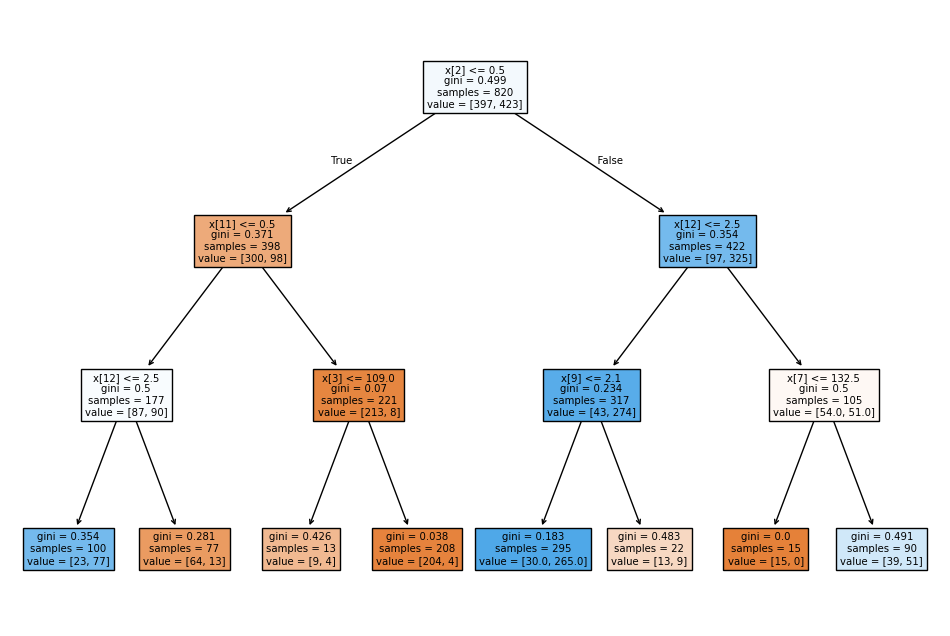

In [8]:
# Визуализация дерева
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
tree.plot_tree(clf, filled=True)
plt.show()

# **Этап 3. Подобрать гиперпараметры дерева решений:**

In [9]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier


# Загрузка данных
X = clean_data.iloc[:,:-1].values
y = clean_data.iloc[:,-1:].values
# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Определение модели
dt = DecisionTreeClassifier()
# Определение сетки гиперпараметров
param_grid = {
    'max_depth': [4, 6, 8, 10],
    'min_samples_split': [3, 5, 10],
    'min_samples_leaf': [1, 2, 7],
    'criterion': ['gini', 'entropy']
}
# Настройка GridSearchCV
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy')
# Обучение и подбор гиперпараметров
grid_search.fit(X_train, y_train)
# Лучшие гиперпараметры
best_params = grid_search.best_params_
print("Лучшие параметры:", best_params)
# Оценка модели с лучшими параметрами
best_model = grid_search.best_estimator_
print("Точность на тестовых данных:", best_model.score(X_test, y_test))

Лучшие параметры: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 3}
Точность на тестовых данных: 0.9853658536585366


In [10]:
# Обучение модели с лучшими параметрами
best_dt_classifier = DecisionTreeClassifier(**best_params)
best_dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_split=3)

In [11]:
from sklearn.metrics import accuracy_score, f1_score

y_pred = best_dt_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Точность:", accuracy)
print("F1-скор:", f1)

Точность: 0.9853658536585366
F1-скор: 0.9852216748768473


# **Этап 4. Реализовать ансамбли моделей:**

**Бэггинг**

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

# Загрузка данных
X = clean_data.iloc[:,:-1].values
y = clean_data.iloc[:,-1:].values
# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Создаем классификатор
bagging_classifier = BaggingClassifier(n_estimators=10) # Количество базовых моделей (итераций)
# Обучаем классификатора
bagging_classifier.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:888: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BaggingClassifier()

**Бустинг**

In [13]:
import xgboost as xgb
from sklearn.model_selection import train_test_split


# Загрузка данных
X = clean_data.iloc[:,:-1].values
y = clean_data.iloc[:,-1:].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Инициализация и обучение XGBoost
xg_clf = xgb.XGBClassifier()
xg_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

**Стекинг**

In [14]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


# Загрузка данных
X = clean_data.iloc[:,:-1].values
y = clean_data.iloc[:,-1:].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Определение базовых моделей
base_estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('dt', DecisionTreeClassifier(max_depth=3, random_state=42))
    ]
# Метамодель
final_estimator = LogisticRegression()
# Создание стекинг-классификатора
stacking_clf = StackingClassifier(estimators=base_estimators, final_estimator=final_estimator)
# Обучение и оценка модели
stacking_clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


StackingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                               ('dt',
                                DecisionTreeClassifier(max_depth=3,
                                                       random_state=42))],
                   final_estimator=LogisticRegression())

# **Этап 5. Оценить качество моделей:**

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
# Предсказания модели
y_pred = bagging_classifier.predict(X_test)
# Метрики
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
print(f"Точность: {accuracy}")
print(f"Точность (Precision): {precision}")
print(f"Полнота (Recall): {recall}")
print(f"F1-score: {f1}")
# Матрица ошибок
cm = confusion_matrix(y_test, y_pred)
print(f"Матрица ошибок:\n {cm}")

Точность: 0.9707317073170731
Точность (Precision): 0.9707310108509424
Полнота (Recall): 0.9707310108509424
F1-score: 0.9707310108509424
Матрица ошибок:
 [[ 99   3]
 [  3 100]]


In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
# Предсказания модели
y_pred = xg_clf.predict(X_test)
# Метрики
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
print(f"Точность: {accuracy}")
print(f"Точность (Precision): {precision}")
print(f"Полнота (Recall): {recall}")
print(f"F1-score: {f1}")
# Матрица ошибок
cm = confusion_matrix(y_test, y_pred)
print(f"Матрица ошибок:\n {cm}")

Точность: 0.9853658536585366
Точность (Precision): 0.9857142857142858
Полнота (Recall): 0.9854368932038835
F1-score: 0.9853644606268295
Матрица ошибок:
 [[102   0]
 [  3 100]]


In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
# Предсказания модели
y_pred = stacking_clf.predict(X_test)
# Метрики
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
print(f"Точность: {accuracy}")
print(f"Точность (Precision): {precision}")
print(f"Полнота (Recall): {recall}")
print(f"F1-score: {f1}")
# Матрица ошибок
cm = confusion_matrix(y_test, y_pred)
print(f"Матрица ошибок:\n {cm}")

Точность: 0.9853658536585366
Точность (Precision): 0.9857142857142858
Полнота (Recall): 0.9854368932038835
F1-score: 0.9853644606268295
Матрица ошибок:
 [[102   0]
 [  3 100]]
